<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">Project2</h3>
</div>

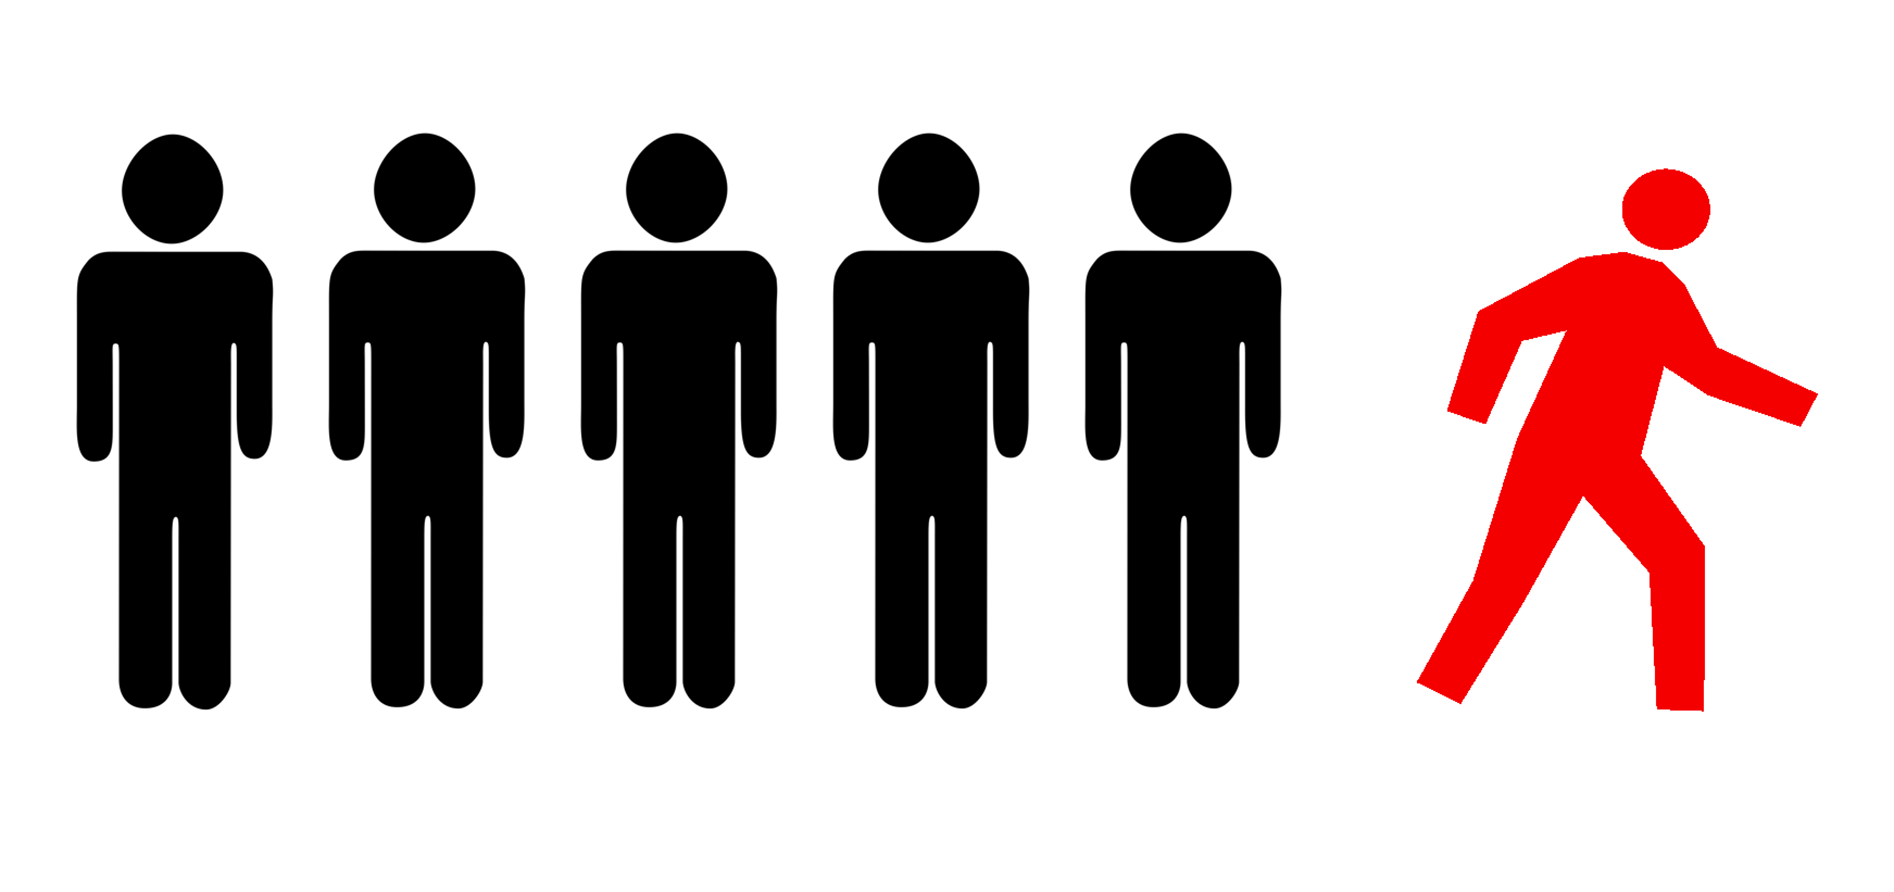

## Importing the libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and Prepare Data

In [80]:
df = pd.read_csv('./Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [83]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## EDA

In [84]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [85]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [86]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [88]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,France,Male,32,6,0.00,2,1,1,179093.26
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04
...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05
5191,682,France,Female,58,1,0.00,1,1,1,706.50
5390,735,France,Female,38,1,0.00,3,0,0,92220.12
860,667,France,Male,43,8,190227.46,1,1,0,97508.04


In [89]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,596,Germany,Male,32,3,96709.07,2,0,0,41788.37
4684,623,France,Male,43,1,0.00,2,1,1,146379.30
1731,601,Spain,Female,44,4,0.00,2,1,0,58561.31
4742,506,Germany,Male,59,8,119152.10,2,1,1,170679.74
4521,560,Spain,Female,27,7,124995.98,1,1,1,114669.79
...,...,...,...,...,...,...,...,...,...,...
6412,602,Germany,Female,53,5,98268.84,1,0,1,45038.29
8285,609,France,Male,25,10,0.00,1,0,1,109895.16
7853,730,France,Female,47,7,0.00,1,1,0,33373.26
1095,692,France,Male,29,4,0.00,1,1,0,76755.99


In [90]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [91]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

## Data Preprocessing

In [92]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features; drop the first dummy column to avoid multicollinearity.
# Recommended for linear/logistic models; not needed for tree-based models (RF, XGBoost, etc.)
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

cat_cols = X_train.select_dtypes(include='object').columns
num_cols = X_train.select_dtypes(exclude='object').columns

X_train_cat = encoder.fit_transform(X_train[cat_cols])
X_test_cat  = encoder.transform(X_test[cat_cols])

X_train_num = X_train[num_cols].values
X_test_num  = X_test[num_cols].values

X_train_enc = np.hstack([X_train_num, X_train_cat])
X_test_enc  = np.hstack([X_test_num, X_test_cat])

In [93]:
X_train_enc

array([[686.,  32.,   6., ...,   0.,   0.,   1.],
       [632.,  42.,   4., ...,   1.,   0.,   1.],
       [559.,  24.,   3., ...,   0.,   1.,   1.],
       ...,
       [735.,  38.,   1., ...,   0.,   0.,   0.],
       [667.,  43.,   8., ...,   0.,   0.,   1.],
       [697.,  51.,   1., ...,   1.,   0.,   1.]])

In [94]:
X_test_enc

array([[596.,  32.,   3., ...,   1.,   0.,   1.],
       [623.,  43.,   1., ...,   0.,   0.,   1.],
       [601.,  44.,   4., ...,   0.,   1.,   0.],
       ...,
       [730.,  47.,   7., ...,   0.,   0.,   0.],
       [692.,  29.,   4., ...,   0.,   0.,   1.],
       [628.,  39.,   1., ...,   1.,   0.,   1.]])

In [95]:
encoded_feature_names = encoder.get_feature_names_out(cat_cols)
all_feature_names = list(num_cols) + list(encoded_feature_names)

X_train_enc_df = pd.DataFrame(X_train_enc, columns=all_feature_names)
X_test_enc_df  = pd.DataFrame(X_test_enc, columns=all_feature_names)

In [96]:
X_train_enc_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,686.0,32.0,6.0,0.00,2.0,1.0,1.0,179093.26,0.0,0.0,1.0
1,632.0,42.0,4.0,119624.60,2.0,1.0,1.0,195978.86,1.0,0.0,1.0
2,559.0,24.0,3.0,114739.92,1.0,1.0,0.0,85891.02,0.0,1.0,1.0
3,561.0,27.0,9.0,135637.00,1.0,1.0,0.0,153080.40,0.0,0.0,0.0
4,517.0,56.0,9.0,142147.32,1.0,0.0,0.0,39488.04,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7995,768.0,54.0,8.0,69712.74,1.0,1.0,1.0,69381.05,0.0,0.0,1.0
7996,682.0,58.0,1.0,0.00,1.0,1.0,1.0,706.50,0.0,0.0,0.0
7997,735.0,38.0,1.0,0.00,3.0,0.0,0.0,92220.12,0.0,0.0,0.0
7998,667.0,43.0,8.0,190227.46,1.0,1.0,0.0,97508.04,0.0,0.0,1.0


In [97]:
X_test_enc_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,596.0,32.0,3.0,96709.07,2.0,0.0,0.0,41788.37,1.0,0.0,1.0
1,623.0,43.0,1.0,0.00,2.0,1.0,1.0,146379.30,0.0,0.0,1.0
2,601.0,44.0,4.0,0.00,2.0,1.0,0.0,58561.31,0.0,1.0,0.0
3,506.0,59.0,8.0,119152.10,2.0,1.0,1.0,170679.74,1.0,0.0,1.0
4,560.0,27.0,7.0,124995.98,1.0,1.0,1.0,114669.79,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,602.0,53.0,5.0,98268.84,1.0,0.0,1.0,45038.29,1.0,0.0,0.0
1996,609.0,25.0,10.0,0.00,1.0,0.0,1.0,109895.16,0.0,0.0,1.0
1997,730.0,47.0,7.0,0.00,1.0,1.0,0.0,33373.26,0.0,0.0,0.0
1998,692.0,29.0,4.0,0.00,1.0,1.0,0.0,76755.99,0.0,0.0,1.0


## Strorytelling - Visualization

In [98]:
target = "Exited"

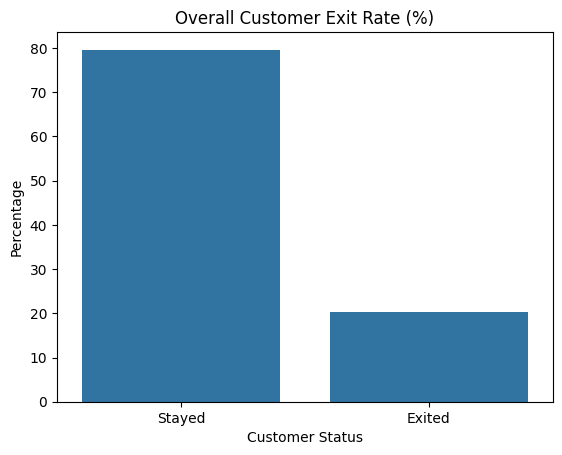

In [99]:
churn_rate = df[target].value_counts(normalize=True) * 100

sns.barplot(
    x=churn_rate.index.map({0: "Stayed", 1: "Exited"}),
    y=churn_rate.values
)

plt.title("Overall Customer Exit Rate (%)")
plt.ylabel("Percentage")
plt.xlabel("Customer Status")
plt.show()


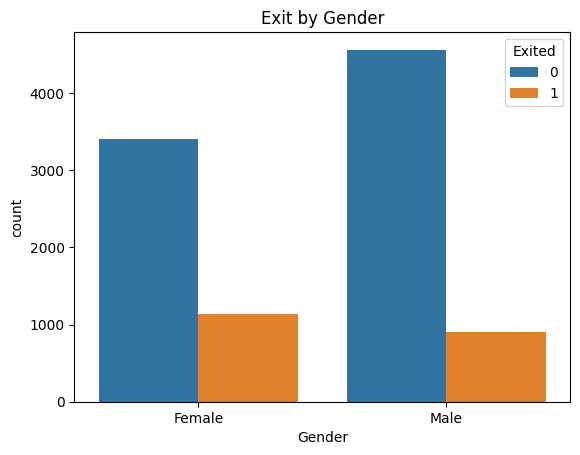

In [101]:
sns.countplot(
    data=df,
    x="Gender",
    hue=target
)

plt.title("Exit by Gender")
plt.show()


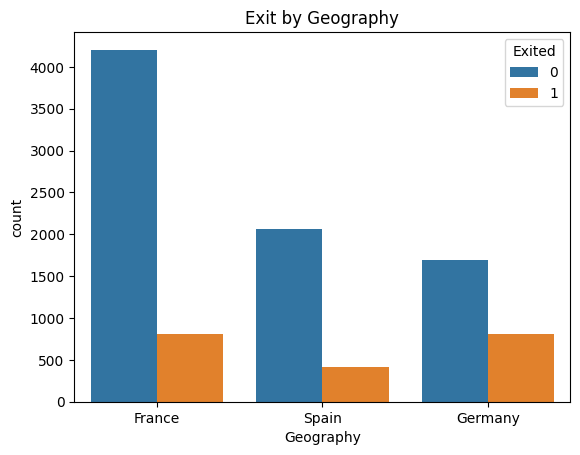

In [110]:
sns.countplot(
    data=df,
    x="Geography",
    hue=target
)

plt.title("Exit by Geography")
plt.show()


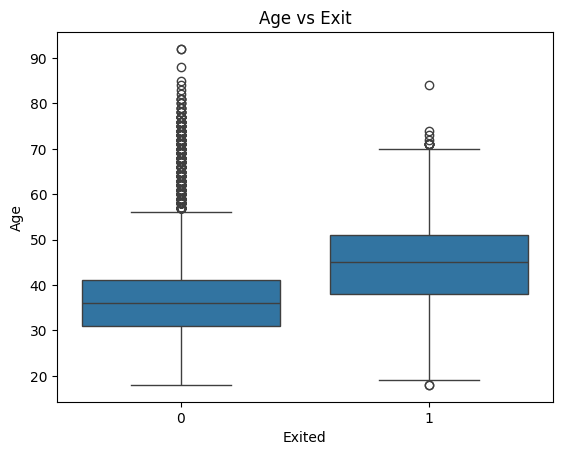

In [102]:
sns.boxplot(
    data=df,
    x=target,
    y="Age"
)

plt.title("Age vs Exit")
plt.xlabel("Exited")
plt.show()


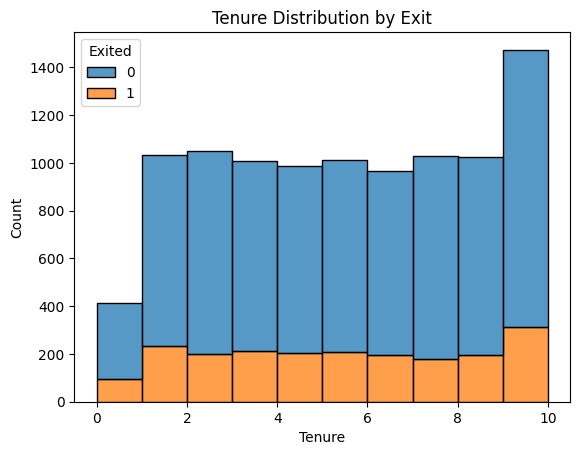

In [103]:
sns.histplot(
    data=df,
    x="Tenure",
    hue=target,
    bins=10,
    multiple="stack"
)

plt.title("Tenure Distribution by Exit")
plt.show()


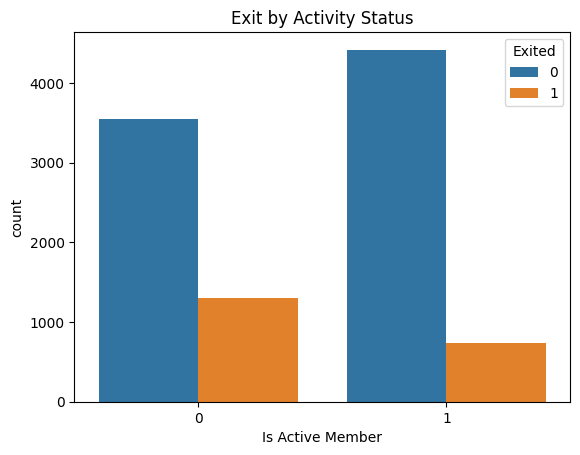

In [104]:
sns.countplot(
    data=df,
    x="IsActiveMember",
    hue=target
)

plt.title("Exit by Activity Status")
plt.xlabel("Is Active Member")
plt.show()


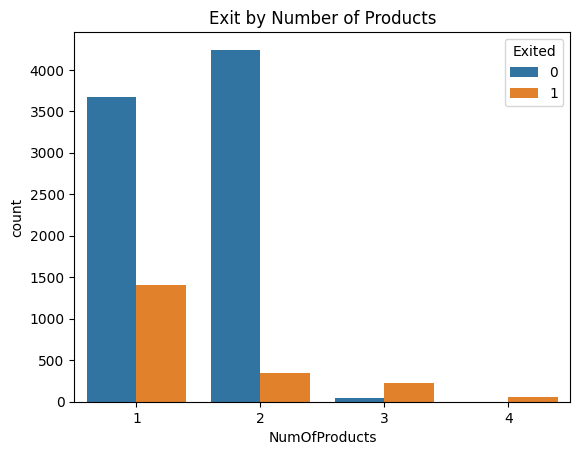

In [105]:
sns.countplot(
    data=df,
    x="NumOfProducts",
    hue=target
)

plt.title("Exit by Number of Products")
plt.show()


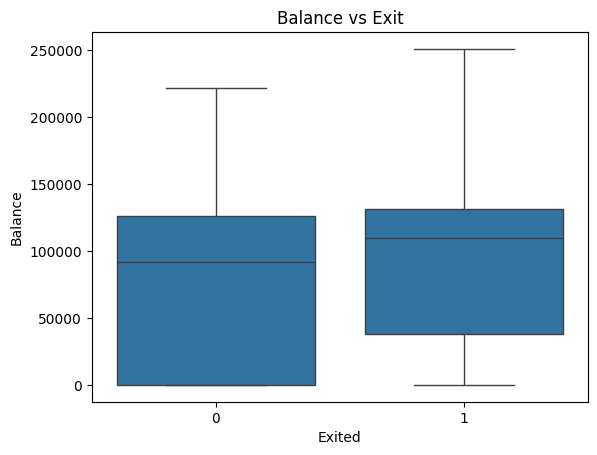

In [106]:
sns.boxplot(
    data=df,
    x=target,
    y="Balance"
)

plt.title("Balance vs Exit")
plt.show()


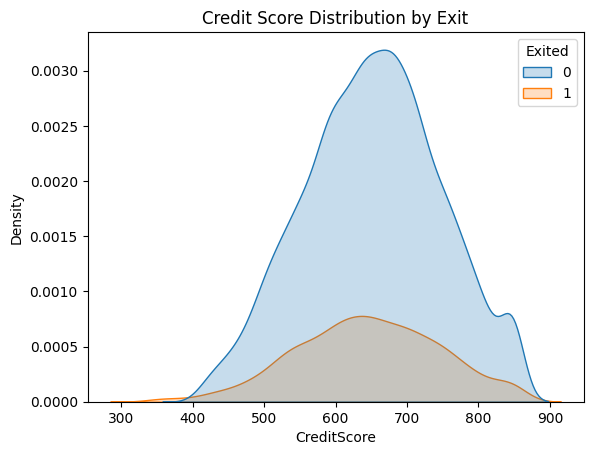

In [107]:
sns.kdeplot(
    data=df,
    x="CreditScore",
    hue=target,
    fill=True
)

plt.title("Credit Score Distribution by Exit")
plt.show()


In [108]:
summary = (
    df.groupby("Exited")[[
        "Age",
        "Tenure",
        "Balance",
        "CreditScore",
        "EstimatedSalary"
    ]]
    .mean()
    .round(2)
)

summary


,Age,Tenure,Balance,CreditScore,EstimatedSalary
Exited,,,,,
0,37.41,5.03,72745.30,651.85,99738.39
1,44.84,4.93,91108.54,645.35,101465.68


## Prepare Data for Machine learning

## Train your model

## Test the model and show the metrics

## Save your final model